# Learning Best Practices for Model Evaluation and Hyperparameter Tuning

## [Loading the Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [20]:
    import numpy as np
    import pandas as pd

    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
    df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# convert label M/B => 1/0
mapping_dictionary = {1:{'M': 1, 'B': 0}}
df = df.replace(mapping_dictionary)
# check if there is missing value
df.isnull().sum()  # => no missing value

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64

In [22]:
# drop the first column
df = df.drop(0, axis = 1)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Check data is legal for sklearn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
1     569 non-null int64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1)
memory usage: 137.9 KB


## Combining transformers and estimators in a pipeline

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

train_X, train_Y = df_train.iloc[:, 1:], df_train.iloc[:, 0]
test_X, test_Y = df_test.iloc[:, 1:], df_test.iloc[:, 0]

clf = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(random_state=1))])

clf.fit(train_X, train_Y)

print('Test Accuracy: {:.3f}'.format(clf.score(test_X, test_Y)))
y_pred = clf.predict(test_X)

Test Accuracy: 0.947


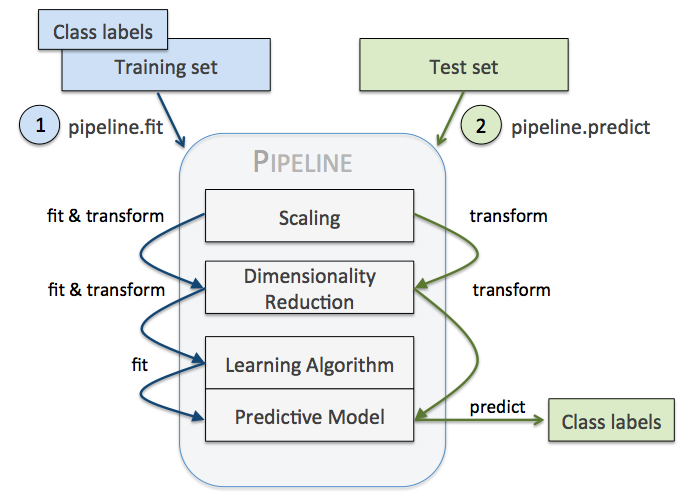

## Using k-fold cross validation to assess model performance

### The holdout method
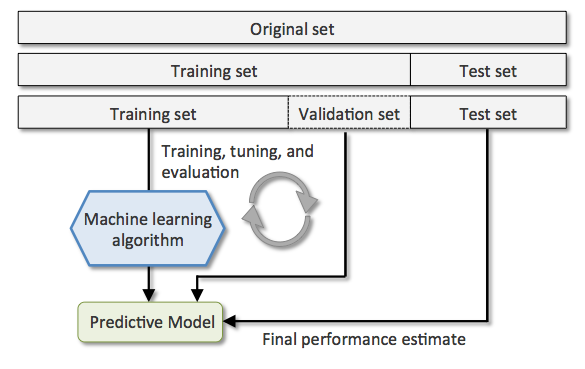

### K-fold cross-validation
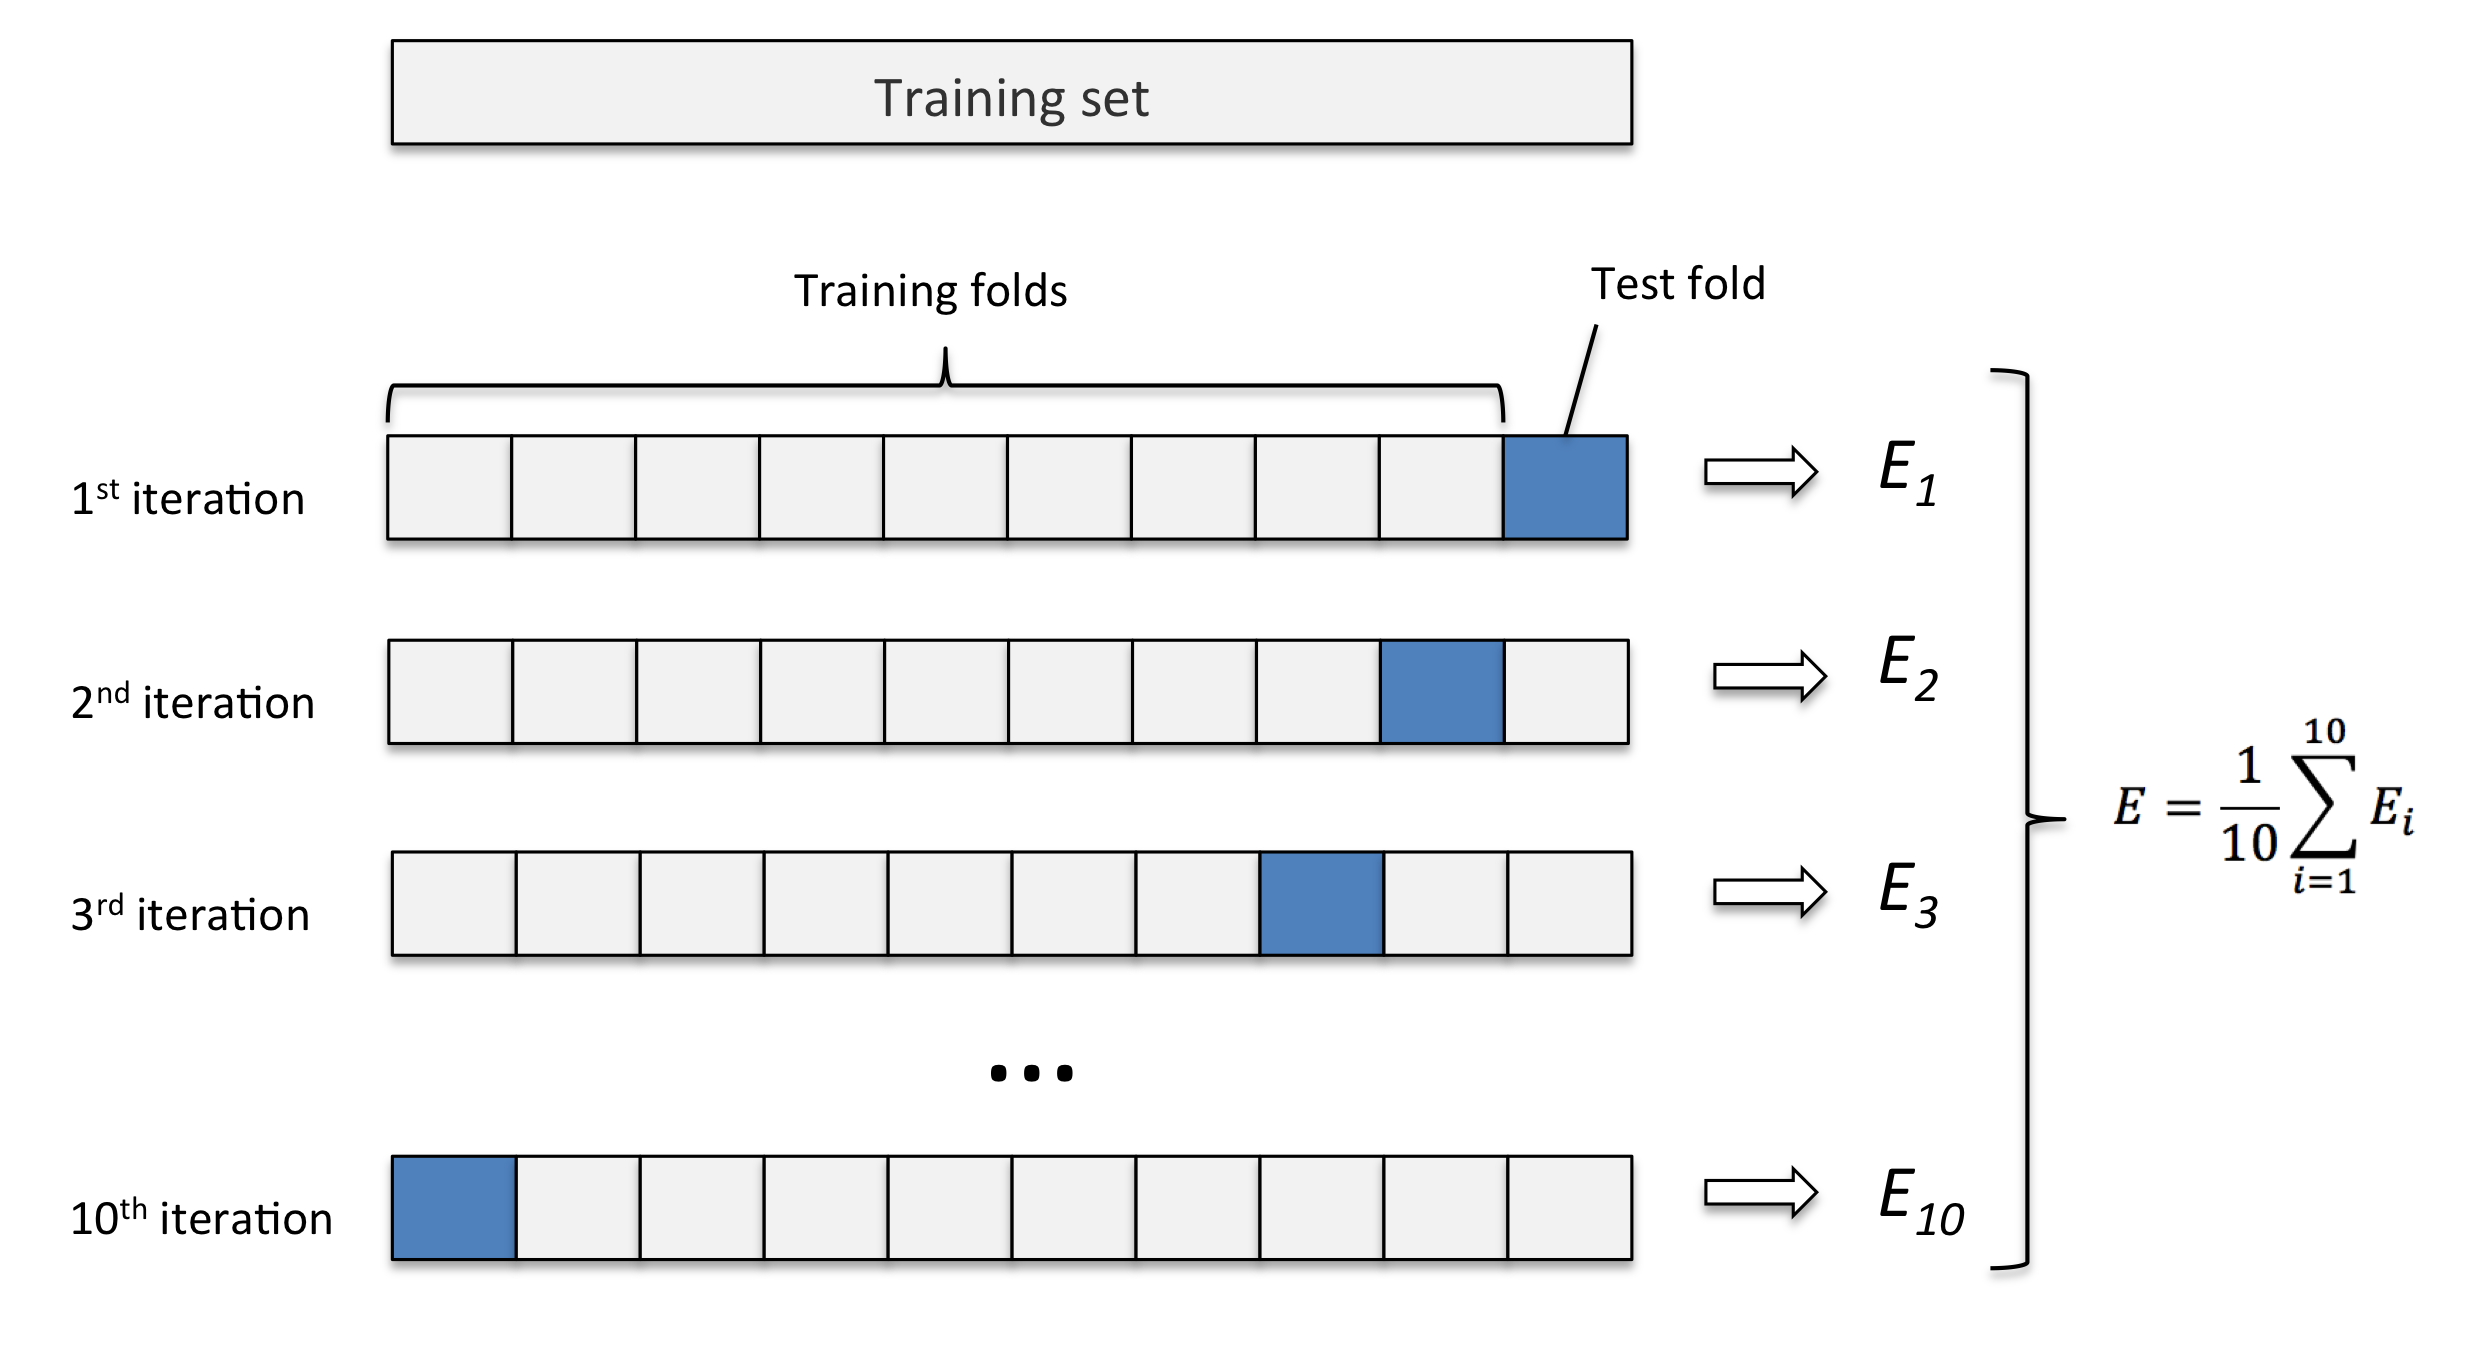

In [66]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=clf,
                         X=train_X,
                         y=train_Y,
                         cv=10,
                         n_jobs=1)
np.set_printoptions(3)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.891  0.978  0.978  0.913  0.935  0.978  0.933  0.956  0.978  0.956]
CV accuracy: 0.950 +/- 0.029


## Fine-tuning machine learning models via grid search

### Tuning hyperparameters via grid search

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'clf__kernel':['linear', 'rbf'], 'clf__C': [0.01, 0.05, 10], 'clf__gamma': [0.1, 1, 'auto']}
clf = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
gs = GridSearchCV(estimator=clf, 
                  param_grid=parameters, 
                  scoring='accuracy', 
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(train_X, train_Y)
print(gs.best_score_)
print(gs.best_params_)

0.962637362637
{'clf__C': 0.05, 'clf__kernel': 'linear', 'clf__gamma': 0.1}


In [80]:
clf = gs.best_estimator_
print('Test accuracy: {:.3f}'.format(clf.score(test_X, test_Y)))

Test accuracy: 0.965


# Exercise - Build a regressor on stock data (predict a stock price)

- Load the data in the stock directory.
- Choose a regressor in sklearn package(SVR, decision tree, KNN, MLP, etc.)
- Make the predictions on test data and report the results.
- Raw data is in "/home/mlb/res/stock/twse/raw/"  or json data is in "/home/mlb/res/stock/twse/json/"
- Feature set consists of thirty features(six features each day, high price, low price, open price, close price, adjust close, volume).

In [68]:
stock_train_X = np.load('stock/train_X.npy') # train 2017-05-01 ~ 2017-05-31
stock_train_Y = np.load('stock/train_Y.npy')
stock_test_X = np.load('stock/test_X.npy') # test 2017-06-01 ~ 2017-06-30
stock_test_Y = np.load('stock/test_Y.npy')

# [Reference to python-machine-learning-book ch6](https://github.com/rasbt/python-machine-learning-book) 